In [82]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [83]:
# Read CSV File
earthquake_data = pd.read_csv('all_month.csv')


In [84]:
# View first 5 rows
earthquake_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-24T02:32:24.208Z,60.240700,-151.038500,54.60,1.10,ml,NaN,NaN,NaN,0.52,...,2023-09-24T02:34:28.879Z,"Kenai Peninsula, Alaska",earthquake,NaN,1.60,NaN,NaN,automatic,ak,ak
1,2023-09-24T02:32:04.780Z,38.822334,-122.850998,-0.63,0.65,md,10.0,123.0,0.02171,0.21,...,2023-09-24T02:33:39.590Z,"10 km WNW of The Geysers, CA",earthquake,0.51,2.40,0.340,8.0,automatic,nc,nc
2,2023-09-24T02:25:52.951Z,59.845400,-152.259600,85.80,1.50,ml,NaN,NaN,NaN,0.29,...,2023-09-24T02:28:10.637Z,"25 km WNW of Anchor Point, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-09-24T02:22:34.663Z,58.249700,-155.080200,1.20,1.10,ml,NaN,NaN,NaN,0.32,...,2023-09-24T02:24:37.701Z,"84 km NNW of Karluk, Alaska",earthquake,NaN,1.50,NaN,NaN,automatic,ak,ak
4,2023-09-24T02:07:25.788Z,31.020400,141.875300,10.00,4.50,mb,31.0,136.0,5.92800,0.65,...,2023-09-24T02:26:52.040Z,"Izu Islands, Japan region",earthquake,12.91,1.92,0.127,18.0,reviewed,us,us


In [85]:
# View last 5 rows
earthquake_data.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
9657,2023-08-25T02:50:33.508Z,50.814800,-172.055200,10.00,2.90,ml,15.0,246.0,1.940000,0.56,...,2023-09-08T21:22:13.040Z,"214 km SE of Atka, Alaska",earthquake,7.65,2.019,0.115,10.0,reviewed,us,us
9658,2023-08-25T02:50:22.540Z,38.759500,-122.740333,0.96,1.45,md,39.0,71.0,0.007520,0.05,...,2023-08-28T20:59:24.733Z,"2 km SE of The Geysers, CA",earthquake,0.16,0.210,0.174,32.0,reviewed,nc,nc
9659,2023-08-25T02:48:58.180Z,38.773167,-122.736333,1.34,1.59,md,38.0,66.0,0.010060,0.05,...,2023-08-29T19:03:16.276Z,"2 km ESE of The Geysers, CA",earthquake,0.17,0.250,0.130,29.0,reviewed,nc,nc
9660,2023-08-25T02:47:46.690Z,38.757000,-122.736500,1.03,3.00,md,73.0,32.0,0.007593,0.06,...,2023-08-29T21:08:47.040Z,"3 km SE of The Geysers, CA",earthquake,0.09,0.150,0.281,57.0,reviewed,nc,nc
9661,2023-08-25T02:46:19.324Z,65.401200,-144.774900,4.60,1.30,ml,NaN,NaN,NaN,0.63,...,2023-09-08T16:29:15.478Z,"19 km S of Central, Alaska",earthquake,NaN,0.300,NaN,NaN,reviewed,ak,ak


In [86]:
# Split the 'time' column' and create new columns - 'date' and 'time'
earthquake_data['date'] = earthquake_data['time'].str[:10]
earthquake_data['time2'] = earthquake_data['time'].str[13:22]

# View first 5 rows
earthquake_data.head()



,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date,time2
0,2023-09-24T02:32:24.208Z,60.240700,-151.038500,54.60,1.10,ml,NaN,NaN,NaN,0.52,...,earthquake,NaN,1.60,NaN,NaN,automatic,ak,ak,2023-09-24,:32:24.20
1,2023-09-24T02:32:04.780Z,38.822334,-122.850998,-0.63,0.65,md,10.0,123.0,0.02171,0.21,...,earthquake,0.51,2.40,0.340,8.0,automatic,nc,nc,2023-09-24,:32:04.78
2,2023-09-24T02:25:52.951Z,59.845400,-152.259600,85.80,1.50,ml,NaN,NaN,NaN,0.29,...,earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak,2023-09-24,:25:52.95
3,2023-09-24T02:22:34.663Z,58.249700,-155.080200,1.20,1.10,ml,NaN,NaN,NaN,0.32,...,earthquake,NaN,1.50,NaN,NaN,automatic,ak,ak,2023-09-24,:22:34.66
4,2023-09-24T02:07:25.788Z,31.020400,141.875300,10.00,4.50,mb,31.0,136.0,5.92800,0.65,...,earthquake,12.91,1.92,0.127,18.0,reviewed,us,us,2023-09-24,:07:25.78


In [87]:

# Split the Plcae column into Regions
earthquake_data['country'] = earthquake_data['place'].apply(lambda x: x.split(',')[0])

# View first 5 rows
earthquake_data.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date,time2,country
0,2023-09-24T02:32:24.208Z,60.240700,-151.038500,54.60,1.10,ml,NaN,NaN,NaN,0.52,...,NaN,1.60,NaN,NaN,automatic,ak,ak,2023-09-24,:32:24.20,Kenai Peninsula
1,2023-09-24T02:32:04.780Z,38.822334,-122.850998,-0.63,0.65,md,10.0,123.0,0.02171,0.21,...,0.51,2.40,0.340,8.0,automatic,nc,nc,2023-09-24,:32:04.78,10 km WNW of The Geysers
2,2023-09-24T02:25:52.951Z,59.845400,-152.259600,85.80,1.50,ml,NaN,NaN,NaN,0.29,...,NaN,0.50,NaN,NaN,automatic,ak,ak,2023-09-24,:25:52.95,25 km WNW of Anchor Point
3,2023-09-24T02:22:34.663Z,58.249700,-155.080200,1.20,1.10,ml,NaN,NaN,NaN,0.32,...,NaN,1.50,NaN,NaN,automatic,ak,ak,2023-09-24,:22:34.66,84 km NNW of Karluk
4,2023-09-24T02:07:25.788Z,31.020400,141.875300,10.00,4.50,mb,31.0,136.0,5.92800,0.65,...,12.91,1.92,0.127,18.0,reviewed,us,us,2023-09-24,:07:25.78,Izu Islands


In [88]:
# Drop columns
columns_to_drop = ['updated', 'status', 'id']
earthquake_data_c1 = earthquake_data.drop(columns_to_drop, axis=1)

In [89]:
# View first 5 rows
earthquake_data_c1.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,locationSource,magSource,date,time2,country
0,2023-09-24T02:32:24.208Z,60.240700,-151.038500,54.60,1.10,ml,NaN,NaN,NaN,0.52,...,earthquake,NaN,1.60,NaN,NaN,ak,ak,2023-09-24,:32:24.20,Kenai Peninsula
1,2023-09-24T02:32:04.780Z,38.822334,-122.850998,-0.63,0.65,md,10.0,123.0,0.02171,0.21,...,earthquake,0.51,2.40,0.340,8.0,nc,nc,2023-09-24,:32:04.78,10 km WNW of The Geysers
2,2023-09-24T02:25:52.951Z,59.845400,-152.259600,85.80,1.50,ml,NaN,NaN,NaN,0.29,...,earthquake,NaN,0.50,NaN,NaN,ak,ak,2023-09-24,:25:52.95,25 km WNW of Anchor Point
3,2023-09-24T02:22:34.663Z,58.249700,-155.080200,1.20,1.10,ml,NaN,NaN,NaN,0.32,...,earthquake,NaN,1.50,NaN,NaN,ak,ak,2023-09-24,:22:34.66,84 km NNW of Karluk
4,2023-09-24T02:07:25.788Z,31.020400,141.875300,10.00,4.50,mb,31.0,136.0,5.92800,0.65,...,earthquake,12.91,1.92,0.127,18.0,us,us,2023-09-24,:07:25.78,Izu Islands


In [90]:
# Sort data according to the Magnitude
earthquake_data_c2 = earthquake_data_c1.sort_values(by =[ 'mag'], ascending=False)

In [91]:
# View first 5 rows
earthquake_data_c2.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,locationSource,magSource,date,time2,country
8164,2023-08-28T19:55:30.869Z,-6.8051,116.5269,500.000,7.1,mww,147.0,22.0,2.360,0.87,...,earthquake,8.23,1.835,0.037,70.0,us,us,2023-08-28,:55:30.86,178 km NNE of Gili Air
4121,2023-09-08T22:11:01.432Z,31.0549,-8.3887,19.000,6.8,mww,393.0,22.0,0.991,0.67,...,earthquake,3.12,3.114,0.032,95.0,us,us,2023-09-08,:11:01.43,Al Haouz
4356,2023-09-08T09:09:58.499Z,-32.7244,-179.3069,89.810,6.6,mww,109.0,19.0,3.651,1.31,...,earthquake,8.23,4.720,0.071,19.0,us,us,2023-09-08,:09:58.49,south of the Kermadec Islands
2935,2023-09-12T11:03:18.873Z,19.2687,121.2178,41.281,6.3,mww,133.0,21.0,4.049,0.96,...,earthquake,8.03,5.112,0.046,46.0,us,us,2023-09-12,:03:18.87,73 km N of Namuac
1388,2023-09-18T13:21:23.790Z,26.4336,125.3032,183.483,6.3,mww,113.0,35.0,2.262,1.21,...,earthquake,6.53,4.942,0.044,49.0,us,us,2023-09-18,:21:23.79,180 km N of Hirara


In [92]:
# Delete empty rows
earthquake_data_c3 = earthquake_data_c2.dropna()

In [93]:
# Statistis for the columns
earthquake_data_c3.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000
mean,32.459592,-93.393589,21.872079,1.774982,24.859582,108.126108,0.649576,0.223143,1.950073,2.925085,0.156917,19.935546
std,17.694130,72.891395,64.883484,1.418600,23.419885,61.603365,2.203427,0.252820,4.238024,6.163356,0.086931,31.591443
min,-65.899300,-179.971800,-3.430000,-0.760000,2.000000,12.000000,0.000000,0.000000,0.080000,0.110000,0.000000,1.000000
25%,33.161333,-122.738670,2.700000,0.760000,12.000000,64.000000,0.016300,0.060000,0.270000,0.490000,0.100000,7.000000
50%,37.242667,-117.732833,7.409790,1.260000,18.000000,89.000000,0.057140,0.140000,0.430000,0.820000,0.145000,12.000000
75%,38.841167,-105.137300,12.416000,2.400000,29.000000,137.000000,0.169600,0.230000,1.260000,1.925000,0.200000,21.000000
max,79.568100,179.962800,649.778000,7.100000,393.000000,357.000000,35.654000,2.350000,176.932676,41.242410,1.020000,504.000000


In [94]:
# View first 5 rows
earthquake_data_c3.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,locationSource,magSource,date,time2,country
8164,2023-08-28T19:55:30.869Z,-6.8051,116.5269,500.000,7.1,mww,147.0,22.0,2.360,0.87,...,earthquake,8.23,1.835,0.037,70.0,us,us,2023-08-28,:55:30.86,178 km NNE of Gili Air
4121,2023-09-08T22:11:01.432Z,31.0549,-8.3887,19.000,6.8,mww,393.0,22.0,0.991,0.67,...,earthquake,3.12,3.114,0.032,95.0,us,us,2023-09-08,:11:01.43,Al Haouz
4356,2023-09-08T09:09:58.499Z,-32.7244,-179.3069,89.810,6.6,mww,109.0,19.0,3.651,1.31,...,earthquake,8.23,4.720,0.071,19.0,us,us,2023-09-08,:09:58.49,south of the Kermadec Islands
2935,2023-09-12T11:03:18.873Z,19.2687,121.2178,41.281,6.3,mww,133.0,21.0,4.049,0.96,...,earthquake,8.03,5.112,0.046,46.0,us,us,2023-09-12,:03:18.87,73 km N of Namuac
1388,2023-09-18T13:21:23.790Z,26.4336,125.3032,183.483,6.3,mww,113.0,35.0,2.262,1.21,...,earthquake,6.53,4.942,0.044,49.0,us,us,2023-09-18,:21:23.79,180 km N of Hirara


In [95]:
# Show column headings
earthquake_data_c3.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'place', 'type', 'horizontalError',
       'depthError', 'magError', 'magNst', 'locationSource', 'magSource',
       'date', 'time2', 'country'],
      dtype='object')

In [96]:
# Show the unique entries for the Type column
earthquake_data_c3['type'].unique()

array(['earthquake', 'explosion', 'quarry blast', 'other event'],
      dtype=object)

In [97]:
# Delete the rows with Explosion, Quarry Blast and Other events, we will just use the data that refers to Earthquakes
earthquake_data_cleaned = earthquake_data_c3[(earthquake_data_c2['type']!='explosion') & (earthquake_data_c3['type']!='quarry blast') & (earthquake_data_c3['type']!='other event')]

C:\Users\User\AppData\Local\Temp\ipykernel_22624\1056786184.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  earthquake_data_cleaned = earthquake_data_c3[(earthquake_data_c2['type']!='explosion') & (earthquake_data_c3['type']!='quarry blast') & (earthquake_data_c3['type']!='other event')]


In [98]:
# Show the unique entries for the Type column
earthquake_data_cleaned['type'].unique()

array(['earthquake'], dtype=object)

In [99]:
# View first 5 rows
earthquake_data_cleaned.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,locationSource,magSource,date,time2,country
8164,2023-08-28T19:55:30.869Z,-6.8051,116.5269,500.000,7.1,mww,147.0,22.0,2.360,0.87,...,earthquake,8.23,1.835,0.037,70.0,us,us,2023-08-28,:55:30.86,178 km NNE of Gili Air
4121,2023-09-08T22:11:01.432Z,31.0549,-8.3887,19.000,6.8,mww,393.0,22.0,0.991,0.67,...,earthquake,3.12,3.114,0.032,95.0,us,us,2023-09-08,:11:01.43,Al Haouz
4356,2023-09-08T09:09:58.499Z,-32.7244,-179.3069,89.810,6.6,mww,109.0,19.0,3.651,1.31,...,earthquake,8.23,4.720,0.071,19.0,us,us,2023-09-08,:09:58.49,south of the Kermadec Islands
2935,2023-09-12T11:03:18.873Z,19.2687,121.2178,41.281,6.3,mww,133.0,21.0,4.049,0.96,...,earthquake,8.03,5.112,0.046,46.0,us,us,2023-09-12,:03:18.87,73 km N of Namuac
1388,2023-09-18T13:21:23.790Z,26.4336,125.3032,183.483,6.3,mww,113.0,35.0,2.262,1.21,...,earthquake,6.53,4.942,0.044,49.0,us,us,2023-09-18,:21:23.79,180 km N of Hirara


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


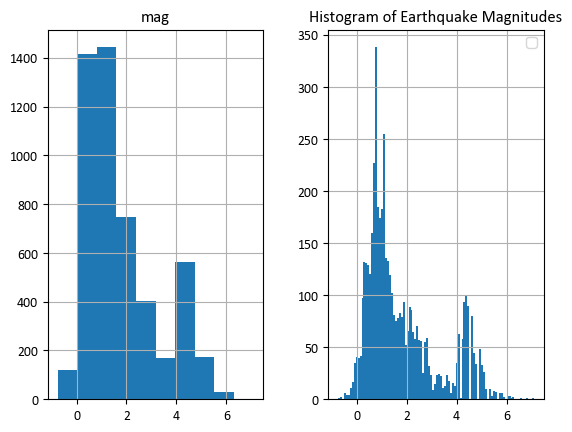

In [100]:
# Plot Histogram showing Earthquake Magnitude
fig, ax = plt.subplots(1,2)
earthquake_data_cleaned.hist(column='mag', ax=ax[0])
earthquake_data_cleaned.hist(column='mag', bins = 100, ax=ax[1])
plt.title('Histogram of Earthquake Magnitudes')
plt.legend()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22624\2478882136.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


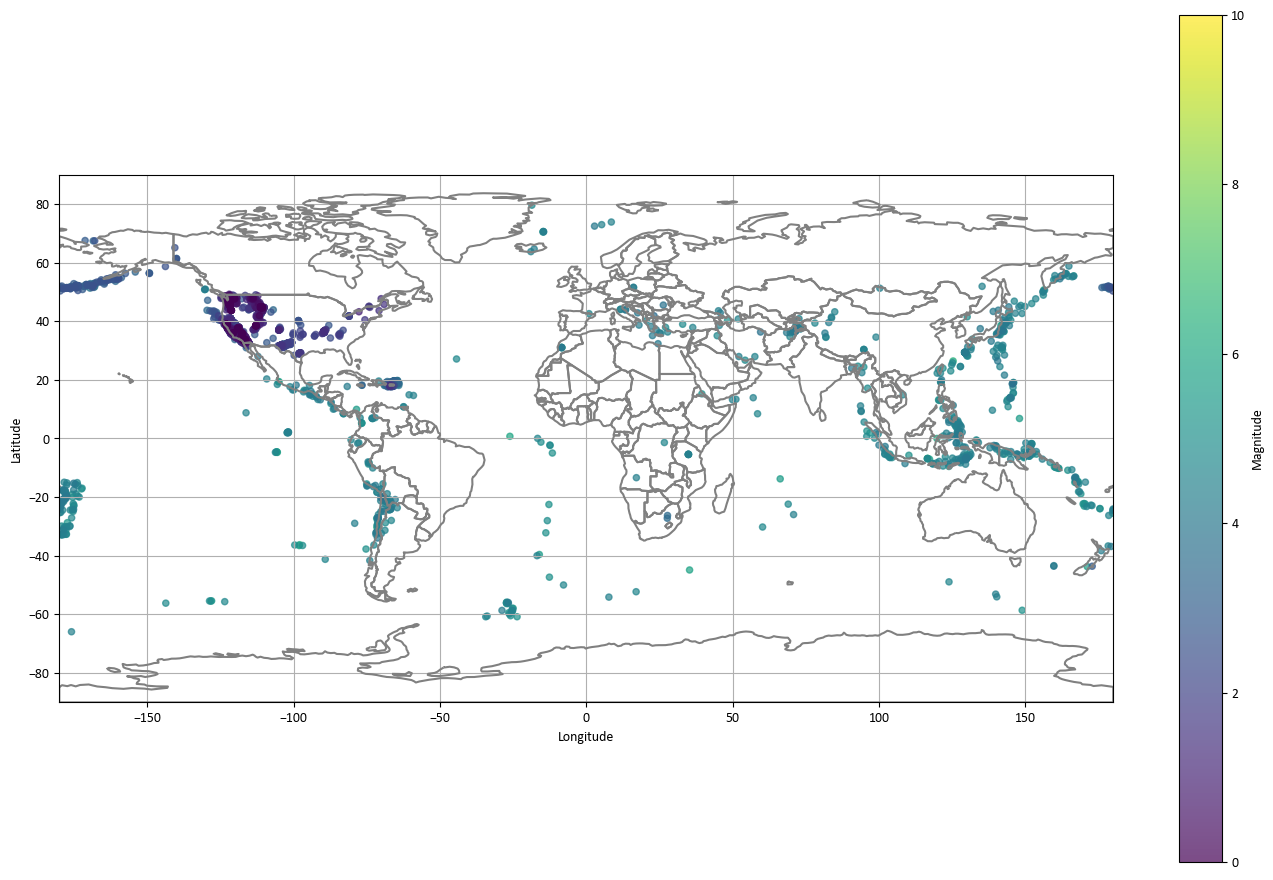

In [101]:
# Read Earth's boundry file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Set the font family
plt.rcParams['font.family'] = 'Calibri'

# Create a colour map
longitude = earthquake_data_cleaned['longitude']
latitude = earthquake_data_cleaned['latitude']
magnitude = earthquake_data_cleaned['mag']

plt.figure(figsize=(17, 11))
sc = plt.scatter(longitude, latitude, c=magnitude, cmap='viridis', s=20, alpha=0.7, vmin=0, vmax=10)
plt.colorbar(sc, label='Magnitude', orientation='vertical')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Overlay country boundaries with grer lines
world.boundary.plot(ax=plt.gca(), linewidth=1.5, color='grey')

# Set the plot limits to show the entire world
plt.xlim(-180, 180)
plt.ylim(-90, 90)

# Show plot
plt.grid(True)
plt.show()




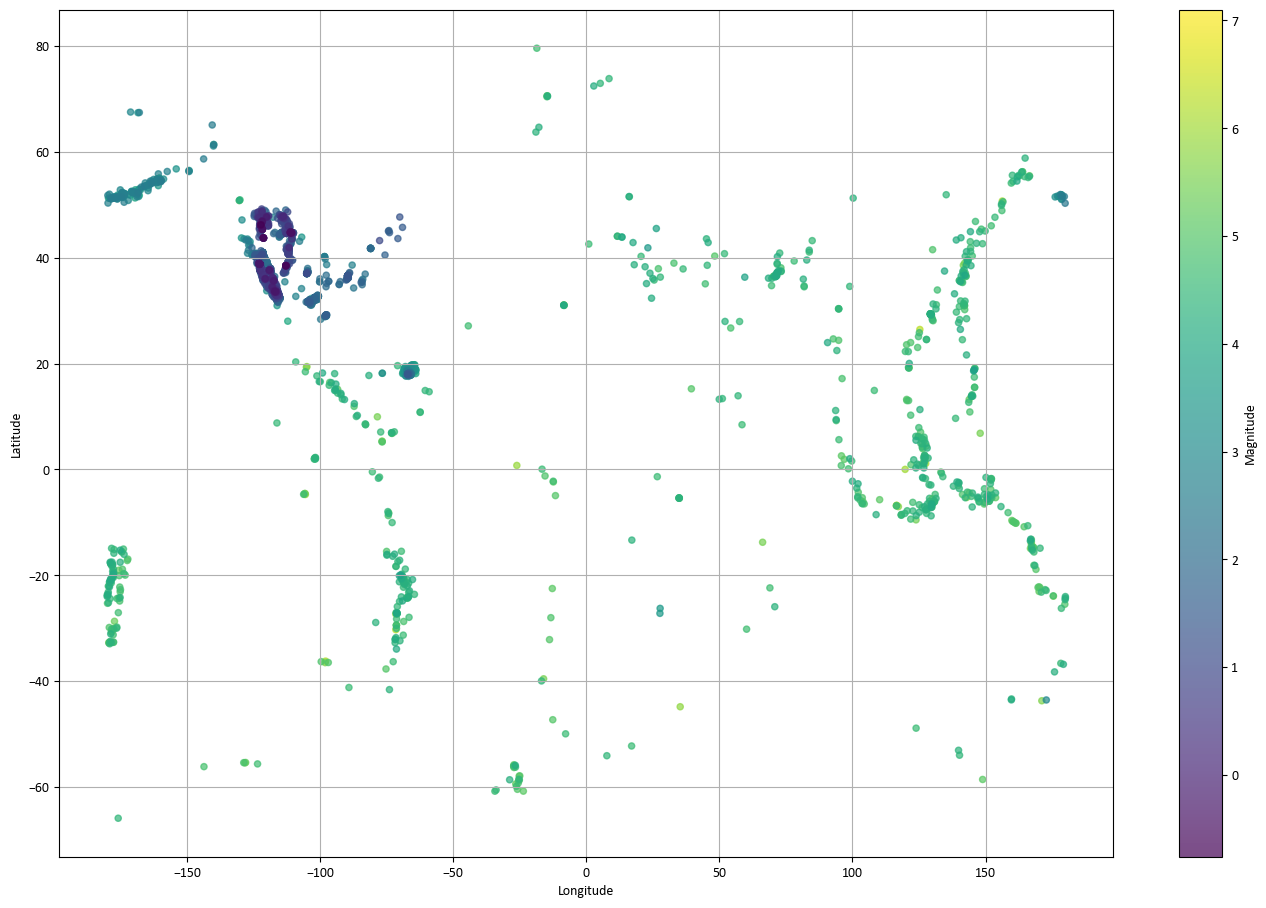

In [102]:
# Set the font family
plt.rcParams['font.family'] = 'Calibri'

# Create a scatter plot to visualize earthquake magnitudes by location
plt.figure(figsize=(17, 11))
plt.scatter(earthquake_data_cleaned['longitude'], earthquake_data_cleaned['latitude'], c=earthquake_data_cleaned['mag'], cmap='viridis', s=20, alpha=0.7)
plt.colorbar(label='Magnitude', orientation='vertical')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Show the plot
plt.show()


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


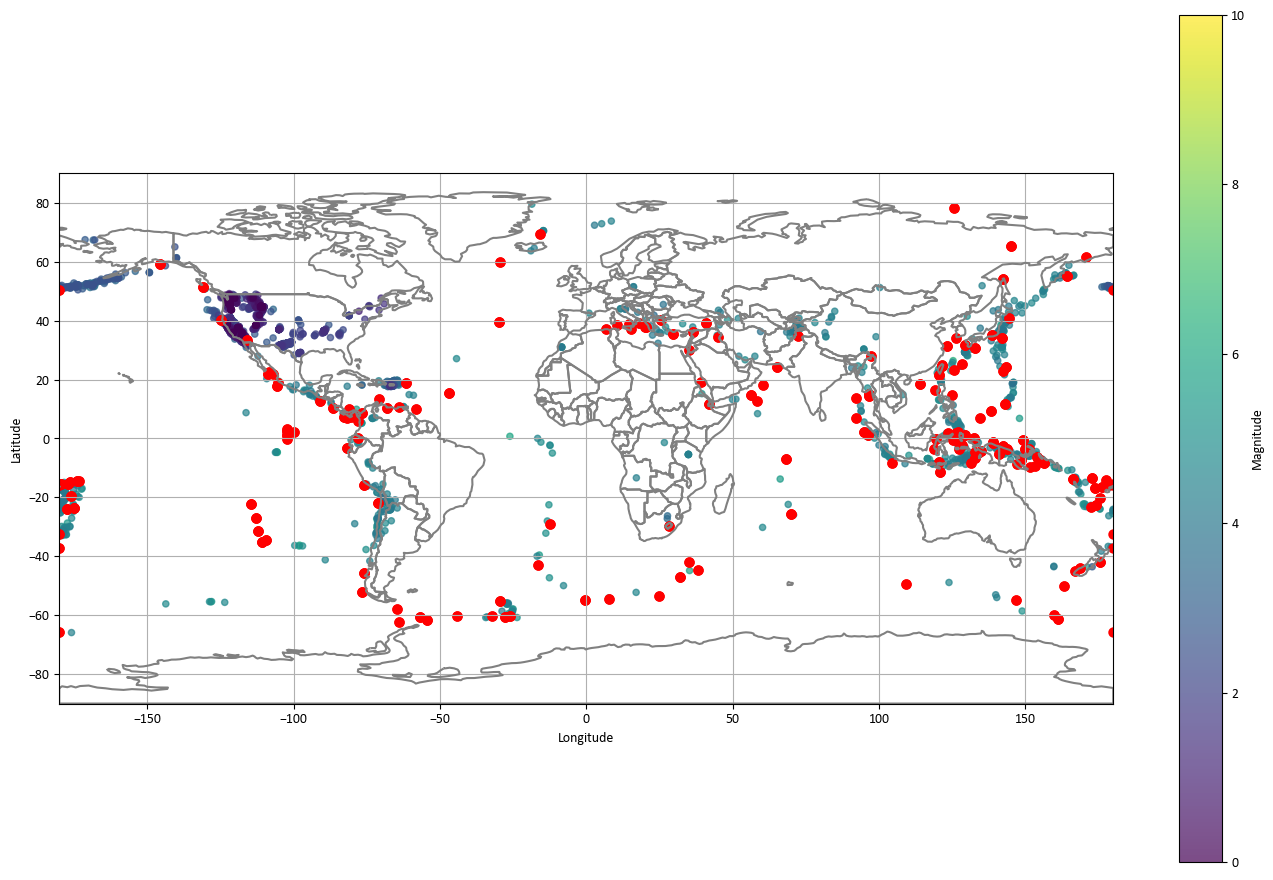

In [103]:
# Load tectonic plate boundaries
tectonic_plates = gpd.read_file('PB2002_boundaries.json')

# Set the font family
plt.rcParams['font.family'] = 'Calibri'

# Check and reproject the tectonic plates data to match the CRS of the country boundaries
if tectonic_plates.crs != {'init': 'epsg:4326'}:
    tectonic_plates = tectonic_plates.to_crs(epsg=4326)

# Create a scatter plot for earthquake data with a contrasting colormap
plt.figure(figsize=(17, 11))
sc = plt.scatter(longitude, latitude, c=magnitude, cmap='viridis', s=20, alpha=0.7, vmin=0, vmax=10)
plt.colorbar(sc, label='Magnitude', orientation='vertical')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Overlay country boundaries with grey lines
world.boundary.plot(ax=plt.gca(), linewidth=1.5, color='grey')

# Overlay tectonic plate boundaries
tectonic_plates.boundary.plot(ax=plt.gca(), linewidth=1.5, color='red')

# Set the plot limits to show the entire world
plt.xlim(-180, 180)
plt.ylim(-90, 90)

plt.grid(True)
plt.show()


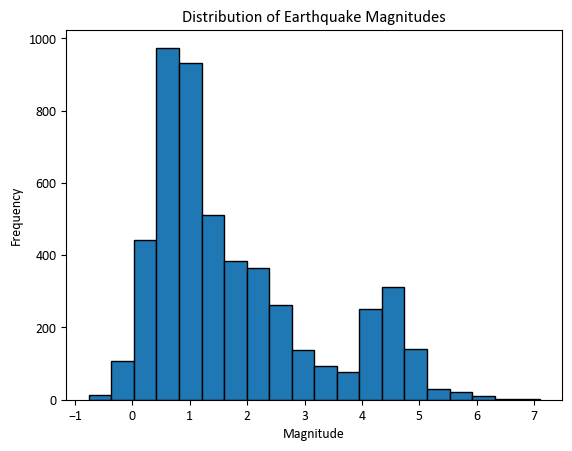

In [104]:
# Create Histogrm with the frequency of each magnitude
plt.hist(earthquake_data_cleaned['mag'], bins=20, edgecolor='black')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Magnitudes')
plt.show()


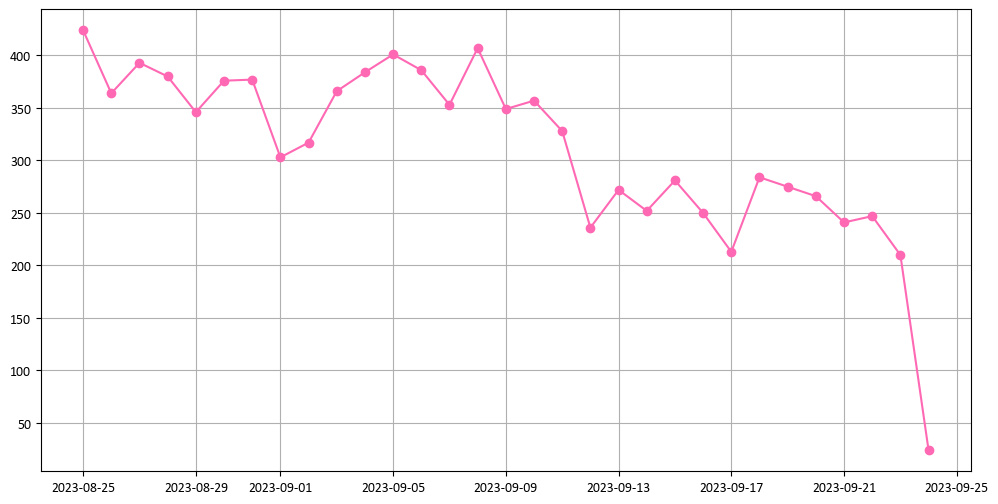

In [114]:
# Convert the 'date' column to datetime using the correct format
earthquake_data['date'] = pd.to_datetime(earthquake_data['date'], format="%Y-%m-%d")

# Set the font family
plt.rcParams['font.family'] = 'Calibri'

# Group the data by date and count the number of earthquakes in each date interval
earthquake_count = earthquake_data.groupby('date').size()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(earthquake_count.index, earthquake_count.values, marker='o', linestyle='-', color='#FF69B4')
plt.grid(True)
plt.show()



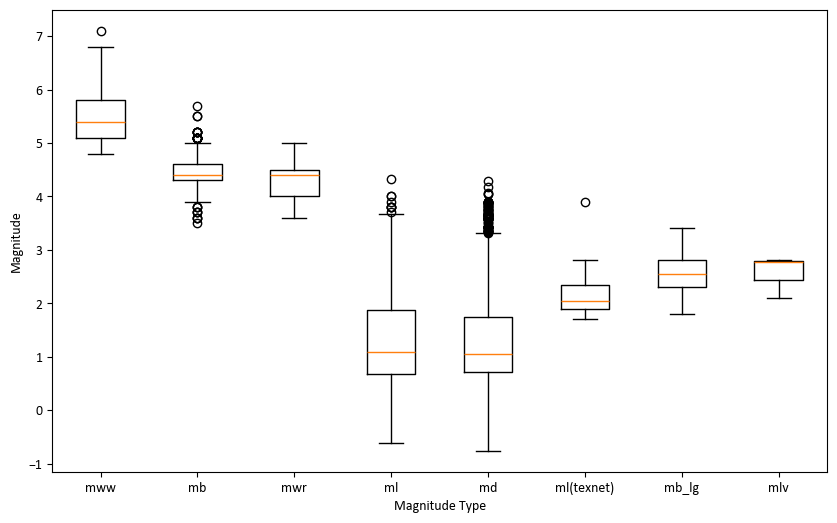

In [115]:
# Set the font family
plt.rcParams['font.family'] = 'Calibri'

# Create Box Plot to show the Magnitude and Magnitude Types
plt.figure(figsize=(10, 6))
plt.boxplot([earthquake_data_cleaned[earthquake_data_cleaned['magType'] == mt]['mag'] for mt in earthquake_data_cleaned['magType'].unique()],
            labels=earthquake_data_cleaned['magType'].unique())
plt.xlabel('Magnitude Type')
plt.ylabel('Magnitude')
plt.show()


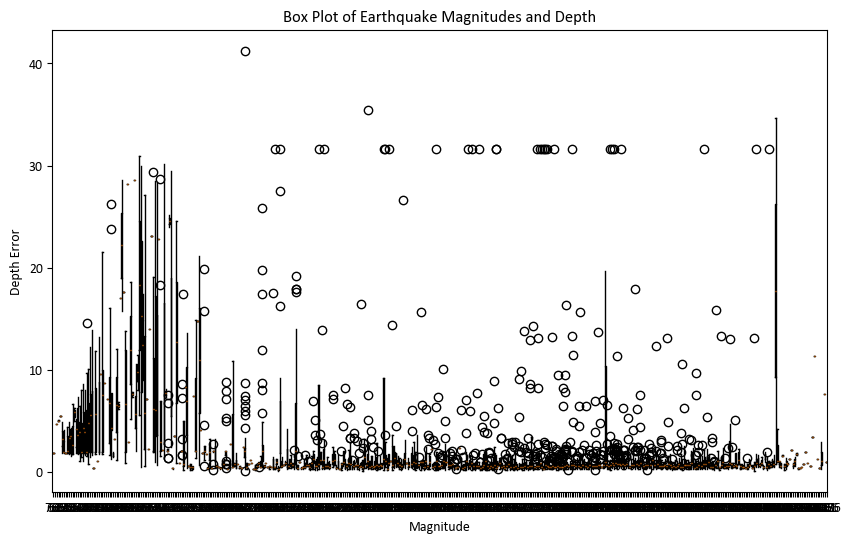

In [107]:
# Create Box Plot to show the Earthquake Magnitude and Depth
plt.figure(figsize=(10, 6))
plt.boxplot([earthquake_data_cleaned[earthquake_data_cleaned['mag'] == mt]['depthError'] for mt in earthquake_data_cleaned['mag'].unique()],
            labels=earthquake_data_cleaned['mag'].unique())
plt.xlabel('Magnitude')
plt.ylabel('Depth Error')
plt.title('Box Plot of Earthquake Magnitudes and Depth')
plt.show()

In [108]:
# Group the data by magType and count the occurrences
magnitude_type_counts = earthquake_data_cleaned['magType'].value_counts()

# Show the counts
magnitude_type_counts


magType
ml            2148
md            2105
mb             685
mww             77
ml(texnet)      20
mb_lg           16
mwr             13
mlv              3
Name: count, dtype: int64

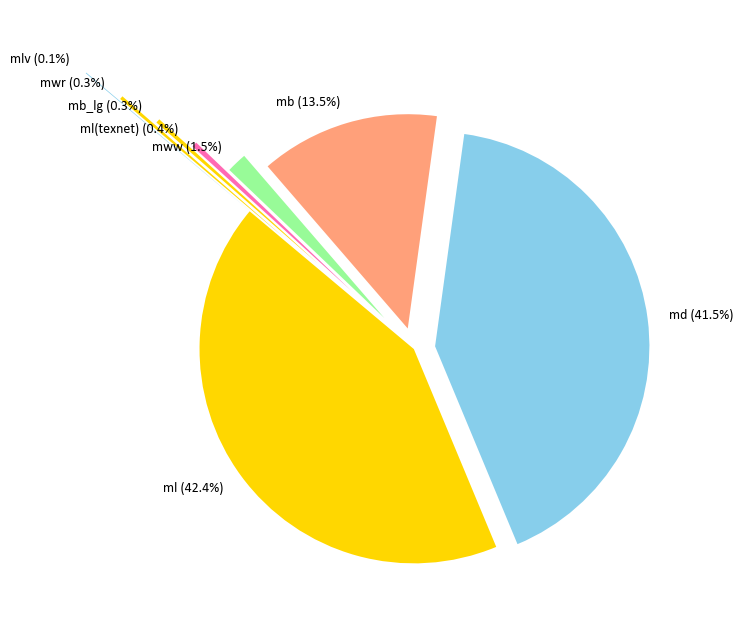

In [117]:
# Define a pastel color palette
pastel_colors = ['#FFD700', '#87CEEB', '#FFA07A', '#98FB98', '#FF69B4', '#FFD700']

# Set the font family
plt.rcParams['font.family'] = 'Calibri'

# Create an explode list with zeros for all segments
explode = [0] * len(magnitude_type_counts)

explode[magnitude_type_counts.index.get_loc('mlv')] = 1
explode[magnitude_type_counts.index.get_loc('mwr')] = 0.8
explode[magnitude_type_counts.index.get_loc('mb_lg')] = 0.6
explode[magnitude_type_counts.index.get_loc('ml(texnet)')] = 0.4
explode[magnitude_type_counts.index.get_loc('mww')] = 0.2
explode[magnitude_type_counts.index.get_loc('mb')] = 0.1
explode[magnitude_type_counts.index.get_loc('md')] = 0.1

# Create a pie chart with pastel colors and explode the specified segments
plt.figure(figsize=(8, 8))
plt.pie(
    magnitude_type_counts,
    labels=[f'{label} ({percent:.1f}%)' for label, percent in zip(magnitude_type_counts.index, 100 * magnitude_type_counts / magnitude_type_counts.sum())],
    autopct='',
    startangle=140,
    colors=pastel_colors,
    explode=explode
)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


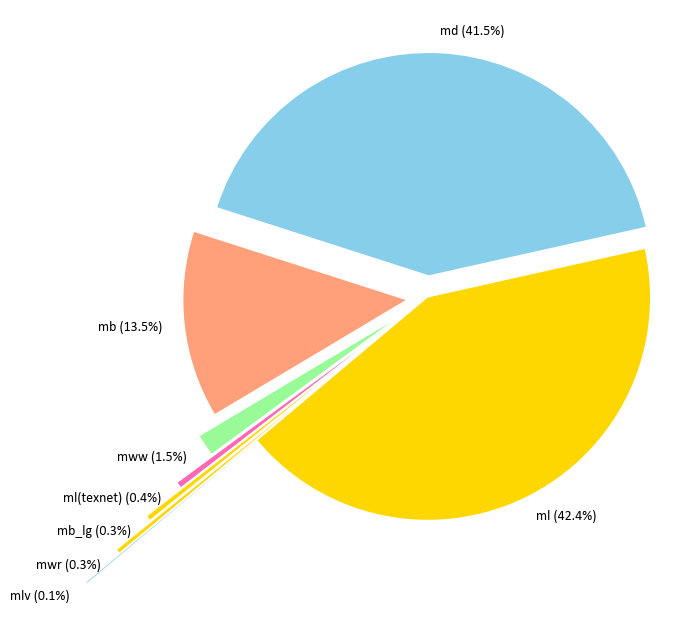

In [118]:
# Define a pastel color palette
pastel_colors = ['#FFD700', '#87CEEB', '#FFA07A', '#98FB98', '#FF69B4', '#FFD700']

# Set the font family
plt.rcParams['font.family'] = 'Calibri'

# Create an explode list with zeros for all segments
explode = [0] * len(magnitude_type_counts)

explode[magnitude_type_counts.index.get_loc('mlv')] = 1
explode[magnitude_type_counts.index.get_loc('mwr')] = 0.8
explode[magnitude_type_counts.index.get_loc('mb_lg')] = 0.6
explode[magnitude_type_counts.index.get_loc('ml(texnet)')] = 0.4
explode[magnitude_type_counts.index.get_loc('mww')] = 0.2
explode[magnitude_type_counts.index.get_loc('mb')] = 0.1
explode[magnitude_type_counts.index.get_loc('md')] = 0.1

# Create a pie chart with pastel colors and adjust the startangle
plt.figure(figsize=(8, 8))
plt.pie(
    magnitude_type_counts,
    labels=[f'{label} ({percent:.1f}%)' for label, percent in zip(magnitude_type_counts.index, 100 * magnitude_type_counts / magnitude_type_counts.sum())],
    autopct='',
    startangle=220,  # Rotate the chart to position the exploding part at the bottom left
    colors=pastel_colors,
    explode=explode
)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Show the pie chart
plt.show()


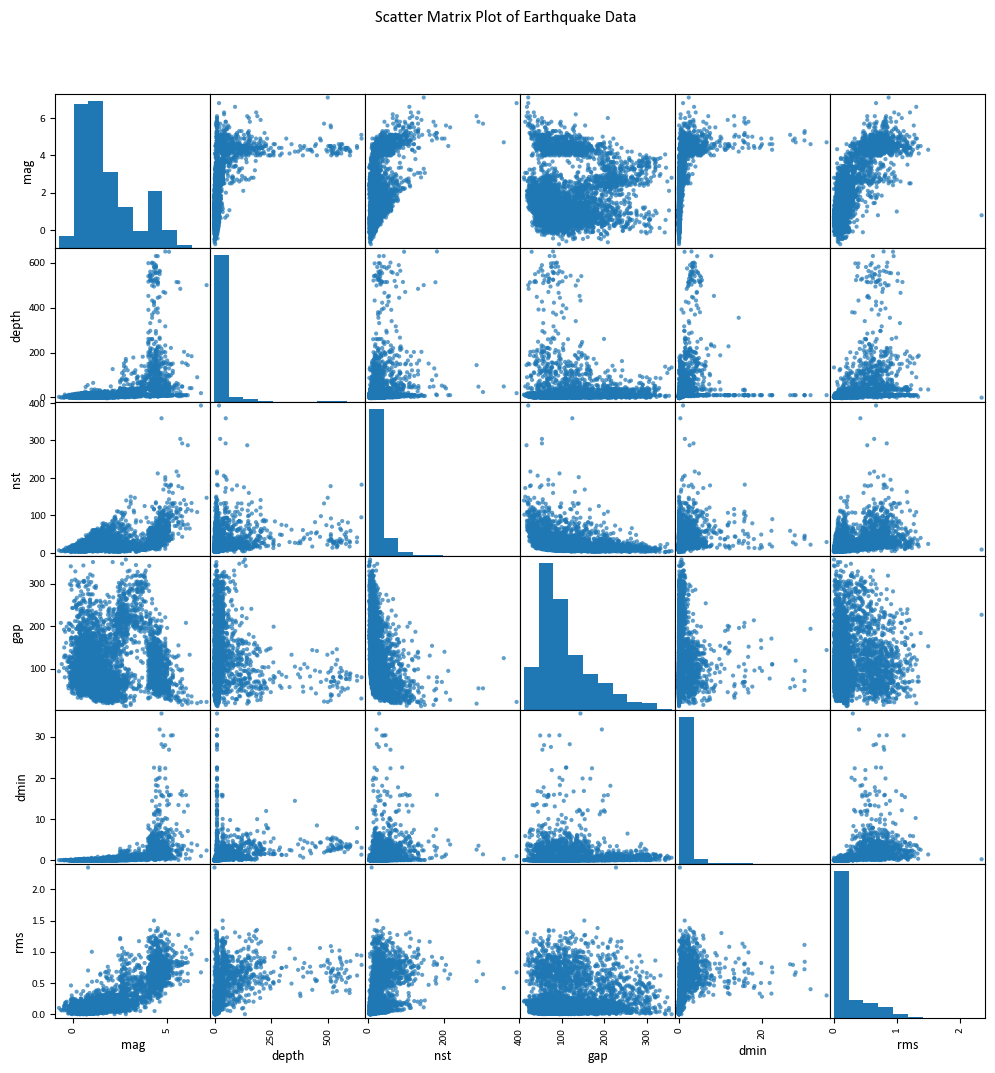

In [110]:
# Create a Scatter Matrix to show the Earthquake Data
from pandas.plotting import scatter_matrix

scatter_matrix(earthquake_data_cleaned[['mag', 'depth', 'nst', 'gap', 'dmin', 'rms']], alpha=0.7, figsize=(12, 12))
plt.suptitle('Scatter Matrix Plot of Earthquake Data', y=0.95)
plt.show()


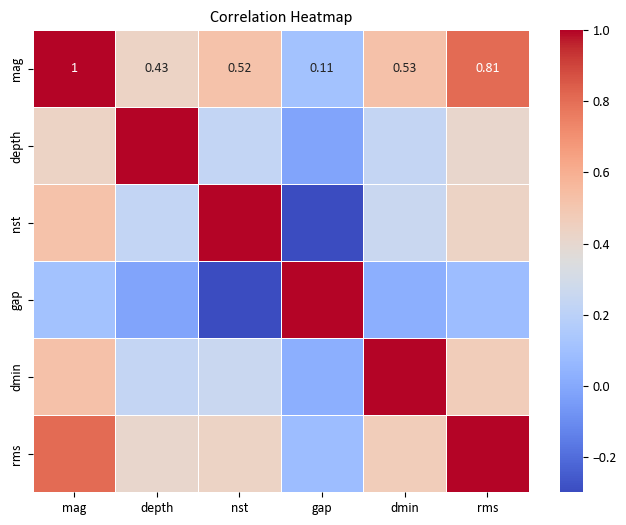

In [111]:
# Create a Heatmap Correlation 
import seaborn as sns

correlation_matrix = earthquake_data_cleaned[['mag', 'depth', 'nst', 'gap', 'dmin', 'rms']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


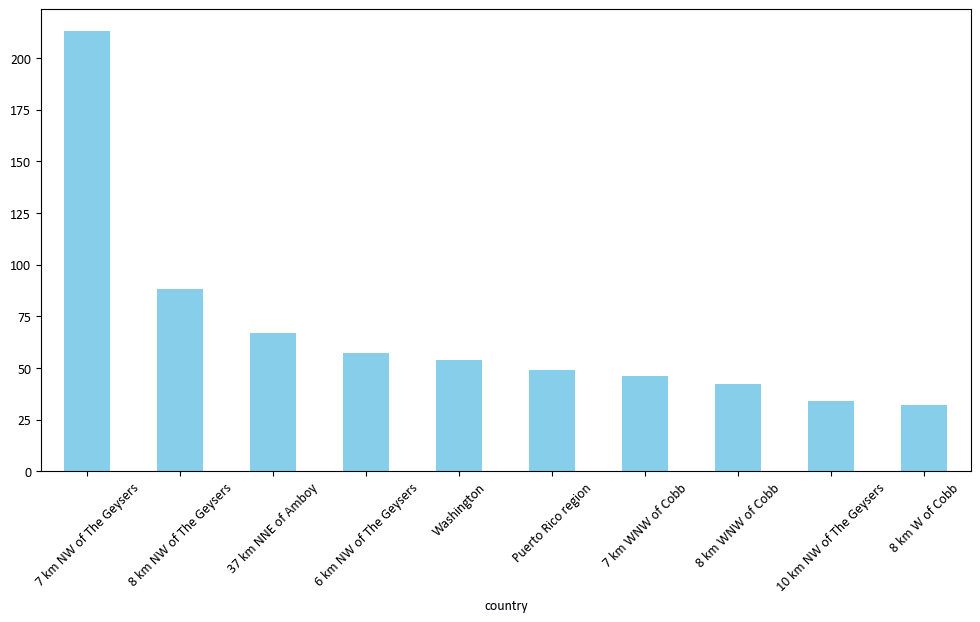

In [112]:
# Create A Bar chart showing the Number of earthquakes in the top 10 regions
earthquake_count_by_place = earthquake_data_cleaned['country'].value_counts()

# Set the font family
plt.rcParams['font.family'] = 'Calibri'

# Limit the number of places to display (optional)
top_n_places = 10  # You can adjust this number
earthquake_count_by_place = earthquake_count_by_place.head(top_n_places)


plt.figure(figsize=(12, 6))
earthquake_count_by_place.plot(kind='bar', color='#87CEEB')  
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

